In [17]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Синтетические данные

In [20]:
X = np.array([258.0, 270.0, 294.0,
              320.0, 342.0, 368.0,
              396.0, 446.0, 480.0,
              586.0])[:, np.newaxis]
y = np.array([236.4, 234.4, 252.8,
              298.6, 314.2, 342.2,
              360.8, 368.0, 391.2,
              390.8])
lr = LinearRegression()
pr = LinearRegression()
quad = PolynomialFeatures(degree=2)
X_quad = quad.fit_transform(X)

In [9]:
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

In [10]:
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quad.transform(X_fit))

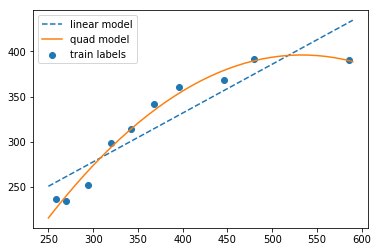

In [13]:
plt.scatter(X, y, label='train labels')
plt.plot(X_fit, y_lin_fit,
         label='linear model', linestyle='--')
plt.plot(X_fit, y_quad_fit,
         label='quad model')
plt.legend(loc='best');

In [18]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

print(f'MSE: '
      f'lin {mean_squared_error(y, y_lin_pred):.3f}, '
      f'quad: {mean_squared_error(y, y_quad_pred):.3f}')

print(f'R2: '
      f'lin {r2_score(y, y_lin_pred):.3f}, '
      f'quad: {r2_score(y, y_quad_pred):.3f}')

MSE: lin 569.780, quad: 61.330
R2: lin 0.832, quad: 0.982


### Вернёмся к оценке домов

In [19]:
X = df[['LSTAT']].values
y = df['MEDV'].values
regr = LinearRegression()

quad = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quad.fit_transform(X)
X_cubic = cubic.fit_transform(X)

X_fit = np.arange(X.min(), X.max())[:, np.newaxis]
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quad.transform(X_fit))
quad_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

NameError: name 'df' is not defined